# Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The medical appointment dataset contains information on over 100k appointments from the country of Brazil with various types of diseases who booked appointments and did not showed up on their appointment Day. 

### Datast Describtion

|Column | Description | 
|---:|:-------------|
| PatientId| Identification of a patient | 
| AppointmentID | Identification of each appointment | 
| Gender| Male or Female | 
| ScheduledDay| The day someone called or registered the appointment | 
| AppointmentDay | The day of the actuall appointment, when they have to visit the doctor | 
| Age | How old is the patient | 
| Neighbourhood | Where the appointment takes place | 
| Scholarship| True or False | 
| Hipertension | True or False | 
| Diabetes| True or False | 
| Alcoholism| True or False | 
| Handcap| True or False | 
| SMS_received| messages sent to the patient | 
| No-show | True or False | 

### The questions to be explored:
- Is there a correlation between missing the appointment and the waiting period? 
- Is there a correlation between missing the appointment and the age ?
- Is there a correlation between missing the appointment and the having Scholarship?
- Is there a correlation between missing the appointment and the Gender ?
- Is there a correlation between missing the appointment and not receiving an SMS message?

#### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I am going to load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

#### 1. Load in the dataset into a pandas dataframe and show the first 5 rows

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Output:
- 110527 Entries 
- 14 Columns
- No null fields. 

#### 3. Check for duplicated rows

In [4]:
df.duplicated().sum()

0

##### Output: No duplicated rows.

#### 4. Check Data Types

In [5]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

##### Output: 
- ScheduledDay and AppointmentDay should be datetime not object

#### 5. Explore Columns & Values

In [6]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

##### Output: Non-positive values detected, to be removed later

### Data Cleaning

##### 1. Convert object to datetime

In [7]:
columns = ['ScheduledDay', 'AppointmentDay']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


##### 2. Remove Unusual value for age

In [8]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df.drop(df.index[99832], inplace=True)

##### 3. Convert String to Int in No-show column

In [10]:
df.replace({'No-show': {'Yes': 1, 'No': 0}}, inplace= True)
df['No-show'] = df['No-show'].astype(int)


##### 4. Drop unused Columns

In [11]:
df.drop(['PatientId', 'Neighbourhood'], axis = 1, inplace = True)

##### 5. Rename Columns names

In [12]:
df.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID': 'Appointment_ID',
                'ScheduledDay': 'Scheduled_Day','AppointmentDay': 'Appointment_Day', 'No-show':'No_show'}, inplace = True)


#####  6. Create a mask for patients who showed and not_showed

In [13]:
showed = df['No_show'] == 0
missed = df['No_show'] == 1
df['showed'] = showed
df['missed'] = missed

In [14]:
def compareToNoShow(column):
    return df.groupby(column).No_show.mean() * 100

<a id='eda'></a>
## Exploratory Data Analysis

Showed V.S. Missed

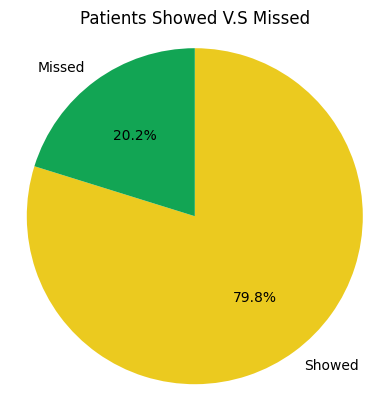

In [15]:
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts, labels = ['Showed', 'Missed'], startangle = 90,
        counterclock = False, autopct='%1.1f%%', colors=['#ebca1f', '#12a554']);
plt.axis('square')
plt.title('Patients Showed V.S Missed');

### Question 1: Is there a correlation between missing the appointment and the waiting period?

#### Add new column (Days Between Appointment Day & Scheduled Day to get waiting period)

In [16]:
waiting_period = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days
df.insert(4, 'waiting_period', waiting_period)
df.head()

,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,waiting_period,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,missed
0,5642903,F,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,0,True,False
1,5642503,M,2016-04-29,2016-04-29,0,56,0,0,0,0,0,0,0,True,False
2,5642549,F,2016-04-29,2016-04-29,0,62,0,0,0,0,0,0,0,True,False
3,5642828,F,2016-04-29,2016-04-29,0,8,0,0,0,0,0,0,0,True,False
4,5642494,F,2016-04-29,2016-04-29,0,56,0,1,1,0,0,0,0,True,False


#### Check for invalid values & Drop them

In [17]:
invalid_values = df.query('waiting_period < 0')
invalid_values

,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,waiting_period,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,missed
27033,5679978,M,2016-05-10,2016-05-09,-1,38,0,0,0,0,1,0,1,False,True
55226,5715660,F,2016-05-18,2016-05-17,-1,19,0,0,0,0,1,0,1,False,True
64175,5664962,F,2016-05-05,2016-05-04,-1,22,0,0,0,0,0,0,1,False,True
71533,5686628,F,2016-05-11,2016-05-05,-6,81,0,0,0,0,0,0,1,False,True
72362,5655637,M,2016-05-04,2016-05-03,-1,7,0,0,0,0,0,0,1,False,True


In [18]:
df.drop(invalid_values.index, inplace=True)

#### Catagorize waiting period

In [19]:
groups = [-1, 0, 4, 15, 179]
groups_labels = ['0 days','1-4 days','5-15 days','16 days and above']
waiting_period_category = pd.cut(df['waiting_period'], groups, labels=groups_labels)
df.insert(5, 'waiting_period_category', waiting_period_category)
df.head()

,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,waiting_period,waiting_period_category,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,missed
0,5642903,F,2016-04-29,2016-04-29,0,0 days,62,0,1,0,0,0,0,0,True,False
1,5642503,M,2016-04-29,2016-04-29,0,0 days,56,0,0,0,0,0,0,0,True,False
2,5642549,F,2016-04-29,2016-04-29,0,0 days,62,0,0,0,0,0,0,0,True,False
3,5642828,F,2016-04-29,2016-04-29,0,0 days,8,0,0,0,0,0,0,0,True,False
4,5642494,F,2016-04-29,2016-04-29,0,0 days,56,0,1,1,0,0,0,0,True,False


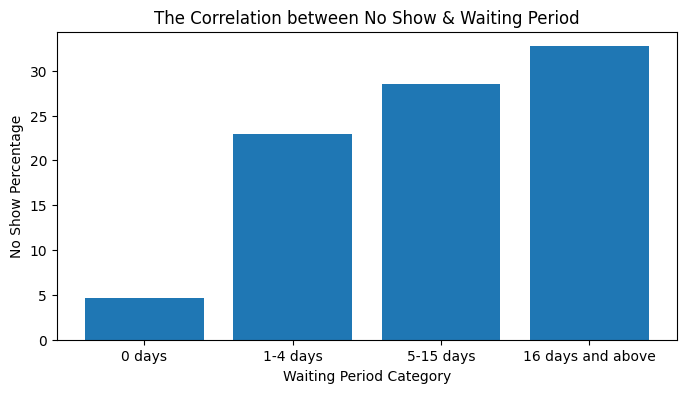

In [20]:
no_show_waiting_period = df.groupby('waiting_period_category').No_show.mean() * 100
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_waiting_period.index, height = no_show_waiting_period)
plt.title('The Correlation between No Show & Waiting Period')
plt.xlabel('Waiting Period Category')
plt.ylabel('No Show Percentage');

##### Output: Looks like the more the waiting period, the more likely the patient is going to miss the appoinment 

### Question 2: Is there a correlation between missing the appointment and the age of the patients?

In [21]:
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [22]:
# Catrgorize Age Column to groups
groups = [-1, 18, 37, 55, 115]
groups_labels = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], groups, labels=groups_labels)
df.insert(7, 'age_group', age_group)
df.head()

,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,waiting_period,waiting_period_category,Age,age_group,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,missed
0,5642903,F,2016-04-29,2016-04-29,0,0 days,62,56 and above,0,1,0,0,0,0,0,True,False
1,5642503,M,2016-04-29,2016-04-29,0,0 days,56,56 and above,0,0,0,0,0,0,0,True,False
2,5642549,F,2016-04-29,2016-04-29,0,0 days,62,56 and above,0,0,0,0,0,0,0,True,False
3,5642828,F,2016-04-29,2016-04-29,0,0 days,8,0-18,0,0,0,0,0,0,0,True,False
4,5642494,F,2016-04-29,2016-04-29,0,0 days,56,56 and above,0,1,1,0,0,0,0,True,False


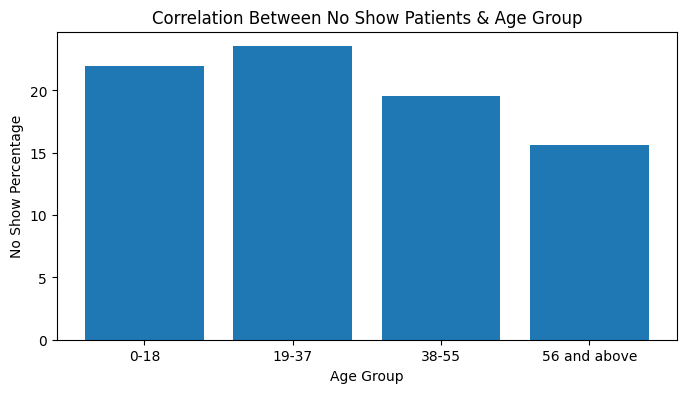

In [23]:
# percentages of no show patients based on age group
no_show_perc_age = compareToNoShow('age_group')
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('Correlation Between No Show Patients & Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');

###### Output: Older ages are more likely to show up, with the exception to the youngest age group, most probably due to the fact that this age group more likely to be accompanied by an adult.

### Question 3: Is there a correlation between missing the appointment and having Scholarship?

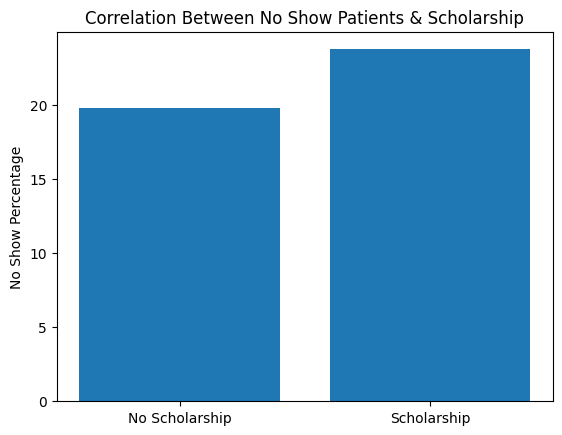

In [24]:
no_show_perc_scholarship = compareToNoShow('Scholarship')
plt.bar(x = no_show_perc_scholarship.index, height = no_show_perc_scholarship)
plt.title('Correlation Between No Show Patients & Scholarship')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

##### Output: From what's shown, more than 20% of patients with scholarship didn't show up , while about 20% of patients without scholarship missed their appointments. So, it seems like the patient with a scholarship is more likely to miss the appointment.

### Question 4: Is there a correlation between missing the appointment and Gender?

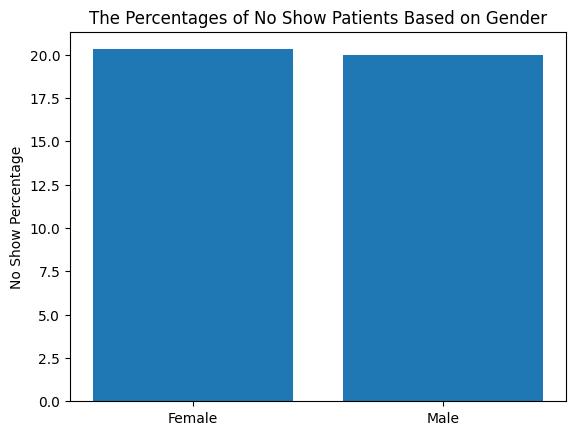

In [25]:
no_show_perc_gender= compareToNoShow('Gender')
plt.bar(x = no_show_perc_gender.index, height = no_show_perc_gender)
plt.title('The Percentages of No Show Patients Based on Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

##### Output: The percentages of no show patients based on gender were pretty close.

### Question 5: Is there a correlation between missing the appointment and not receiving an SMS message?

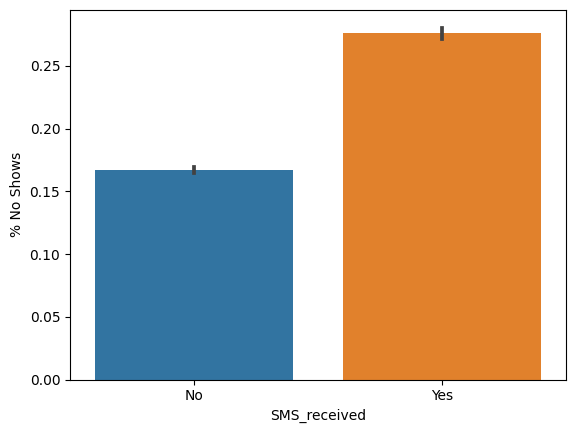

In [28]:
ax = sns.barplot(x=df.SMS_received.map( {1:'Yes', 0:'No'}), y=df.missed)
ax.set_ylabel('% No Shows')
plt.show()


##### Output: Looks like Recieving SMS didn't affect the No Show result, 25% who recieved an SMS didn't show up. We can't define a clear correlation between SMS Recieved and No-Show 

<a id='conclusions'></a>
## Conclusions

### Results

 #### Question 1: Is there a correlation between missing the appointment and the waiting period? 
- Yes, it seems like the waiting period is affecting the no-show status, and we can predict the longer the waiting period (Time Between Scheduled Date & Appointment Date), the more likely the patient will not show up.
 #### Question 2: Is there a correlation between missing the appointment and the age of the patient?
- Yes, it seems like the patient's age is affecting the no-show status, and we can predict if a patient will show up for their scheduled appointment or not. as the Oldest ages are more likely to show up.
 #### Question 3: Is there a correlation between missing the appointment and having Scholarship?
- Yes, it seems like having a scholarship could help us to predict if a patient will show up or not. as the patient with a scholarship is more likely to miss the appointment.
 #### Question 4: Is there a correlation between missing the appointment and Gender?
- No, it seems like the result of no show patients based on gender is pretty close. so the gender can't be considered as a factor to predict if a patient will show up for their appointment or not.
 #### Question 5: Is there a correlation between missing the appointment and not receiving an SMS message?
- No, it seems like Receiving an SMS did not increase the chance that the patient would show to their appointment.


### Limitations

- Missing features that could be useful such as if the patient is employeed or not , or whether the patient have a   series medical issue or not.
- There are some illogical data such as patients with age 0 or less
- Recent data would be much better, since this data was in 2016 
- Covering more than one country would have been better.